### COVID-19 
### Number of RECOVERED updated by DAY
### in the countries: CHINA, GERMANY, ITALY, SOUTH KOREA, JAPAN, USA, AUSTRALIA

In [1]:
# Configuration: setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

from Starts.start import Start
from Starts.startml import *
from Starts.startvis import *  
%matplotlib inline
rcParams['figure.figsize'] = 20, 6

# folder_path = Start.kwargs['folder_path']

# if Start.kwargs['folder_path']:
#     print("Start importing files in folder")   
#     data, files = Start.import_folder(folder_path)

# if Start.kwargs['data_path']:
#     filename = Start.kwargs['data_path']
#     print("Start importing single data ", filename)
#     sdata = Start.import_data(filename)
# else: 
#     print("No Data_Path or Folder_Path is given")

Start importing files in folder
['.gitignore', '01-22-2020.csv', '01-23-2020.csv', '01-24-2020.csv', '01-25-2020.csv', '01-26-2020.csv', '01-27-2020.csv', '01-28-2020.csv', '01-29-2020.csv', '01-30-2020.csv', '01-31-2020.csv', '02-01-2020.csv', '02-02-2020.csv', '02-03-2020.csv', '02-04-2020.csv', '02-05-2020.csv', '02-06-2020.csv', '02-07-2020.csv', '02-08-2020.csv', '02-09-2020.csv', '02-10-2020.csv', '02-11-2020.csv', '02-12-2020.csv', '02-13-2020.csv', '02-14-2020.csv', '02-15-2020.csv', '02-16-2020.csv', '02-17-2020.csv', '02-18-2020.csv', '02-19-2020.csv', '02-20-2020.csv', '02-21-2020.csv', '02-22-2020.csv', '02-23-2020.csv', '02-24-2020.csv', '02-25-2020.csv', '02-26-2020.csv', '02-27-2020.csv', '02-28-2020.csv', '02-29-2020.csv', '03-01-2020.csv', '03-02-2020.csv', '03-03-2020.csv', '03-04-2020.csv', '03-05-2020.csv', '03-06-2020.csv', '03-07-2020.csv', '03-08-2020.csv', '03-09-2020.csv', '03-10-2020.csv', '03-11-2020.csv', '03-12-2020.csv', '03-13-2020.csv', '03-14-2020.csv',

### Number of covid-19 outbreak days 

In [2]:
from covid import *
len(data)

/home/edvs1/lphan/.conda/envs/aic/lib/python3.7/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


333

In [3]:
updated_date=files[-2].split('.')[0]
updated_date

'12-19-2020'

In [4]:
print("Total recovered first day: ", totalrecovered_by_day[0])
print("Total recovered last day: ", totalrecovered_by_day[-1])

Total recovered first day:  28.0
Total recovered last day:  43023052


### New Recovered in the World changed by day

/home/edvs1/lphan/.conda/envs/aic/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.
No handles with labels found to put in legend.


('Last day Increasing', 355083)

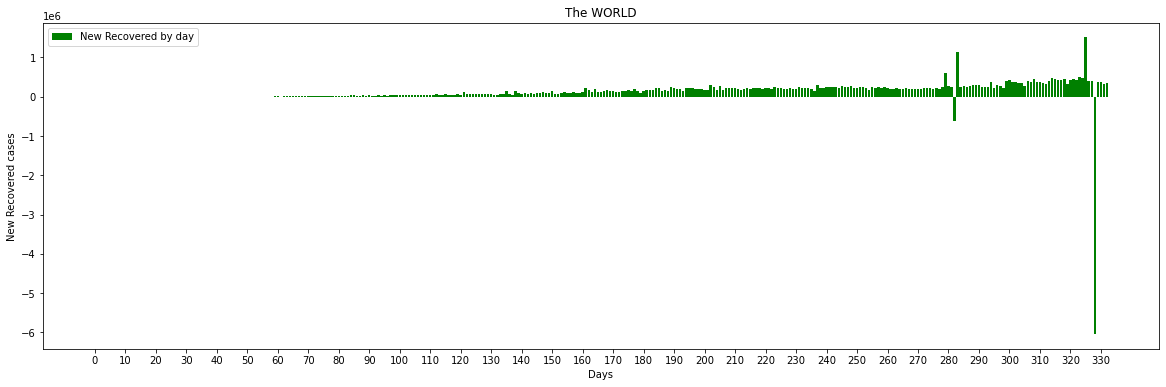

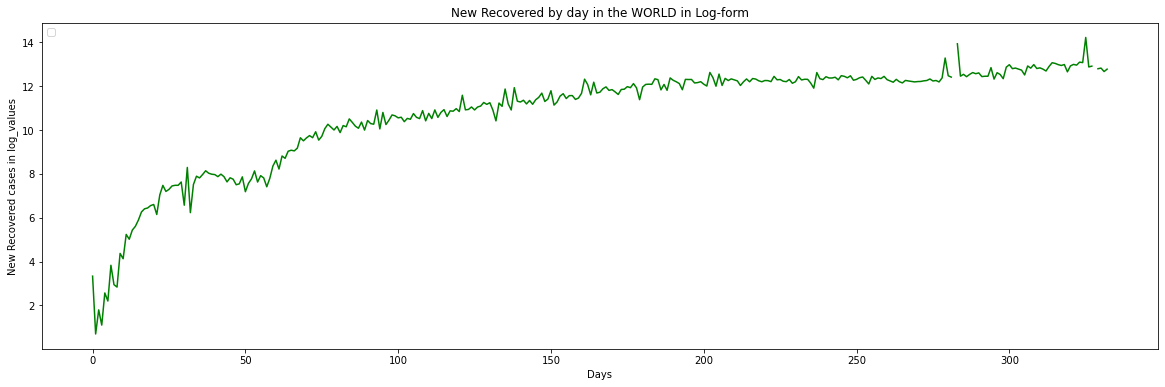

In [5]:
plt.figure(1)
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.bar(x_dat, newRecoveredByDay, color='green', label="New Recovered by day")
plt.xlabel('Days')
plt.ylabel('New Recovered cases')
plt.title("The WORLD")
plt.legend(loc='upper left')

plt.figure(2)
plt.plot(x_dat, np.log(newRecoveredByDay), color='green')
plt.xlabel('Days')
plt.ylabel('New Recovered cases in log_values')
plt.title("New Recovered by day in the WORLD in Log-form")
plt.legend(loc='upper left')

('Last day Increasing', totalrecovered_by_day[-1]-totalrecovered_by_day[-2])

##### NOTE: THERE IS DATA BIAS AT DAY 282 and 328

### Number of RECOVERED in the World from day 0 to latest day

Ratio recovered over Confirmed in last day (%):  56.395
Highest Ratio until now (%):  69.79


('Total Recovered until now: ', 43023052)

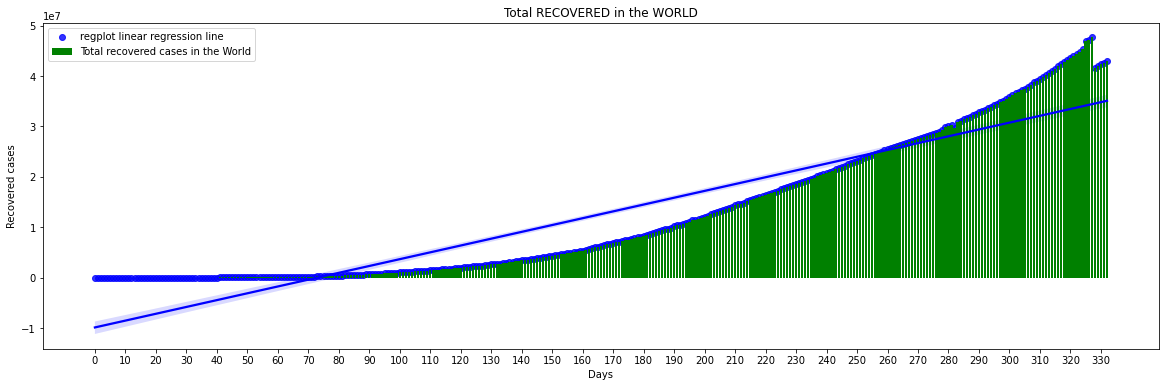

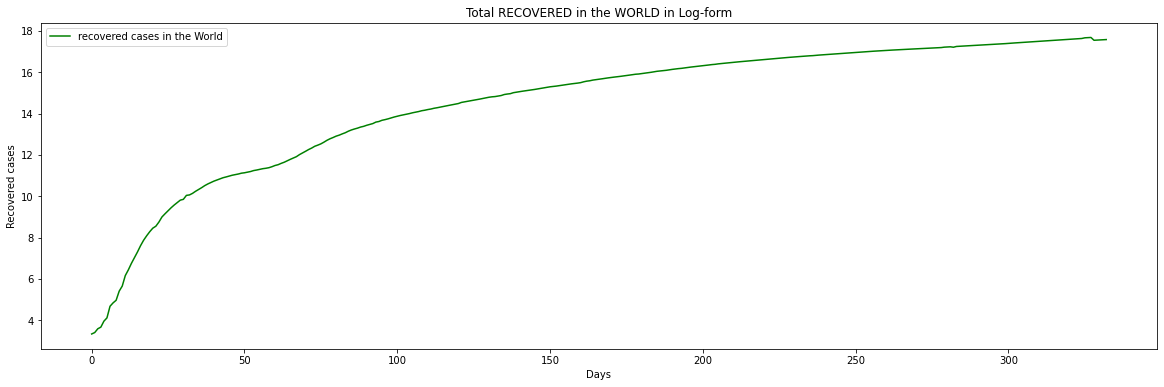

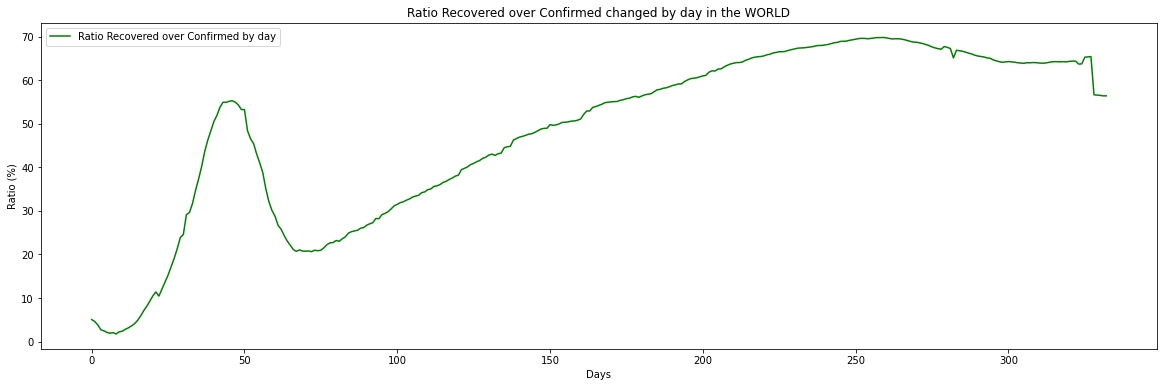

In [6]:
plt.figure(1)
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.bar(x_dat, totalrecovered_by_day, color='green', label='Total recovered cases in the World')
plt.xlabel('Days')
plt.ylabel('Recovered cases')
ax = sns.regplot(x=x_dat, y=totalrecovered_by_day, ci=95, label="regplot linear regression line", color="blue")
ax.legend(loc="upper left")
plt.title("Total RECOVERED in the WORLD")

plt.figure(2)
plt.plot(x_dat, np.log(totalrecovered_by_day), color='green', label='recovered cases in the World')
plt.xlabel('Days')
plt.ylabel('Recovered cases')
plt.legend(loc="upper left")
plt.title("Total RECOVERED in the WORLD in Log-form")

plt.figure(3)
plt.plot(x_dat, ratioRecByDay, color='green', label='Ratio Recovered over Confirmed by day')
plt.xlabel('Days')
plt.ylabel('Ratio (%)')
plt.title("Ratio Recovered over Confirmed changed by day in the WORLD")
plt.legend(loc='upper left')

print("Ratio recovered over Confirmed in last day (%): ", ratioRecByDay[-1])
print('Highest Ratio until now (%): ', np.max(ratioRecByDay))
('Total Recovered until now: ', totalrecovered_by_day[-1])

/home/edvs1/lphan/.conda/envs/aic/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


,China,Germany,Italy,"Korea, South",Japan,US,Australia,Luxembourg,United Kingdom,Canada,Vietnam
Last day Increasing,128.0,11133.0,23384.0,388.0,2522.0,0.0,4.0,0.0,90.0,5913.0,3.0
Total Recovered,88666.0,1107115.0,1249470.0,34722.0,163152.0,0.0,25704.0,35237.0,4354.0,416901.0,1269.0
Highest Number,3994.0,24756.0,39266.0,1369.0,10856.0,150267.0,2605.0,4523.0,266.0,23848.0,59.0


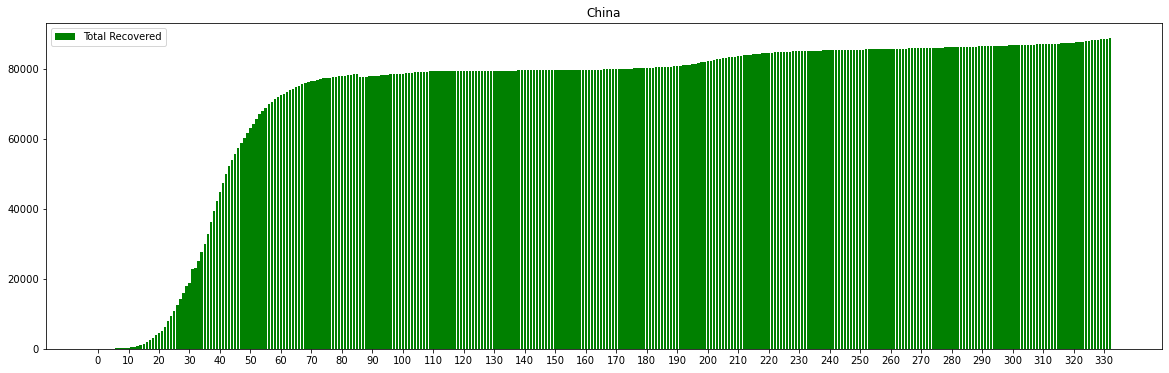

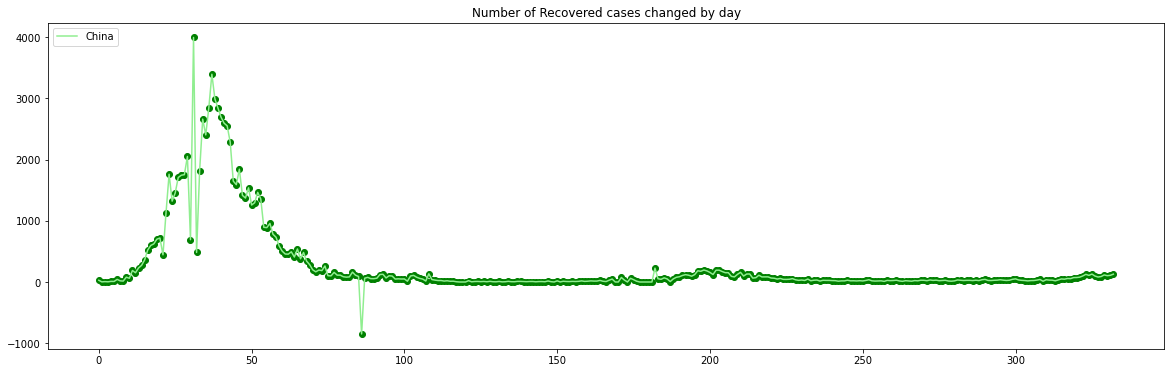

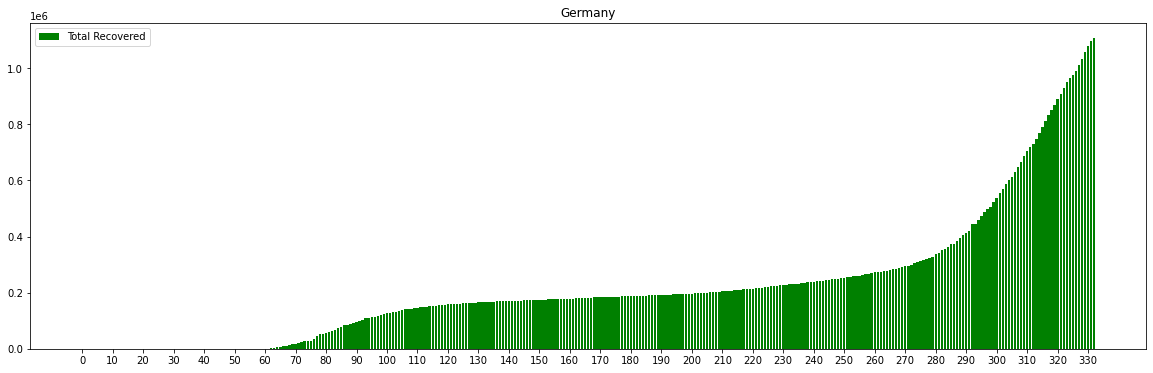

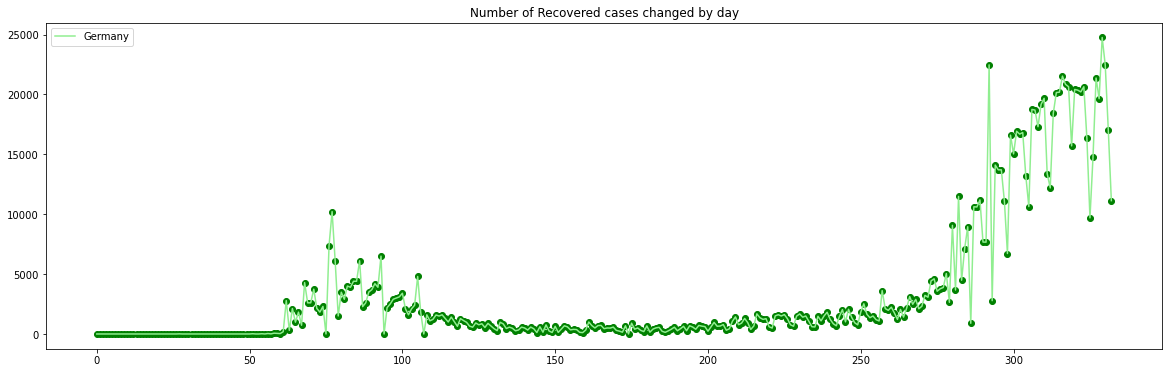

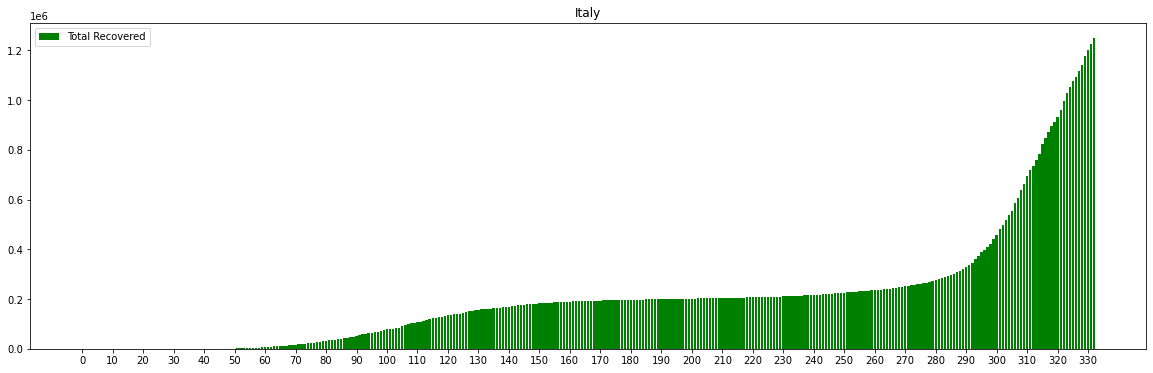

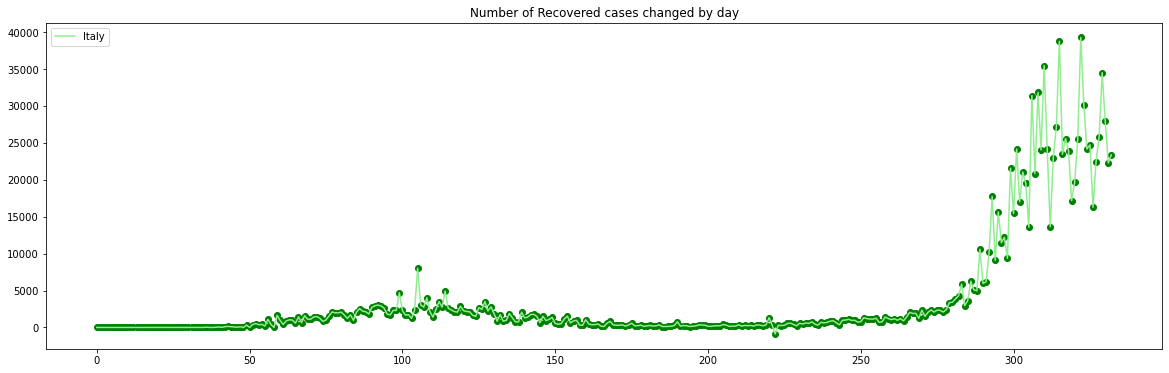

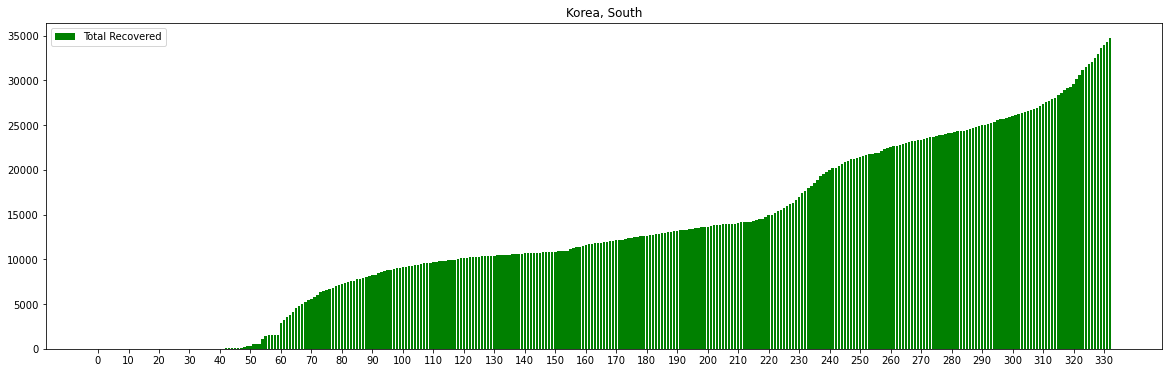

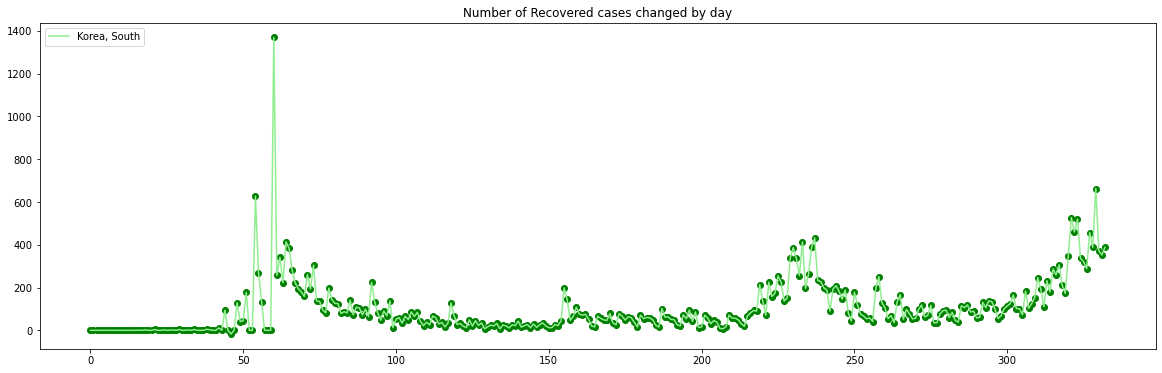

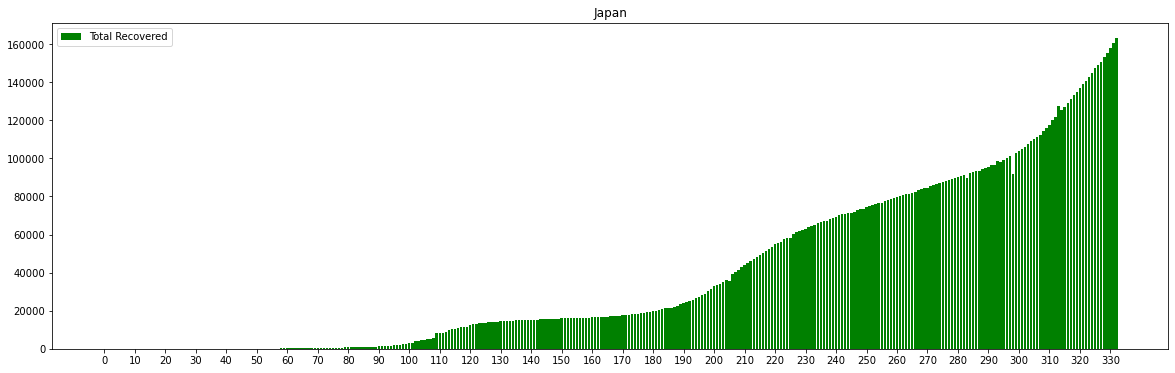

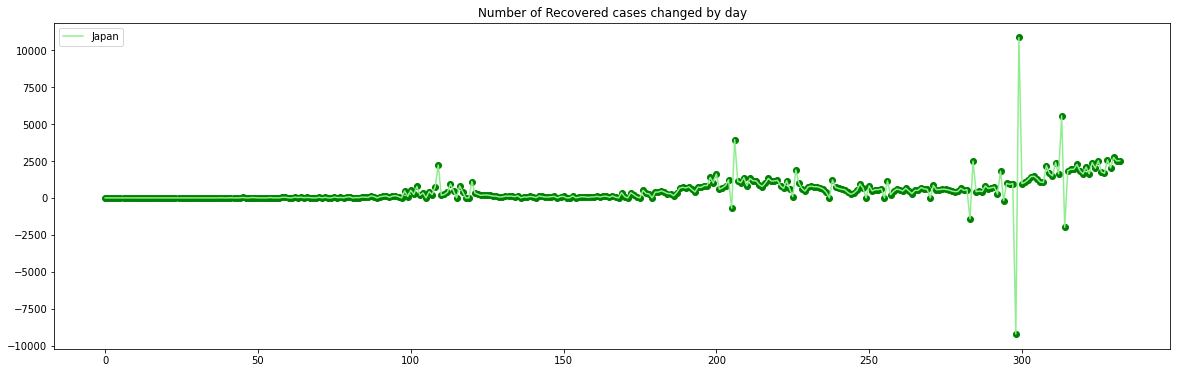

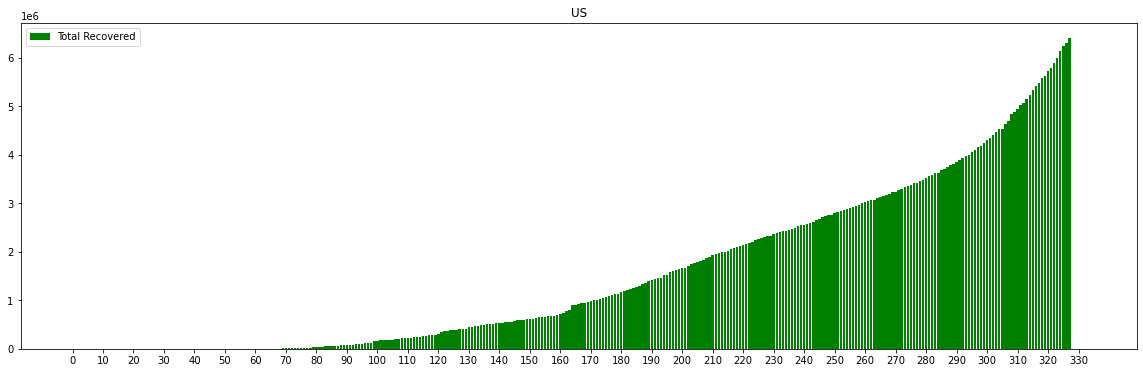

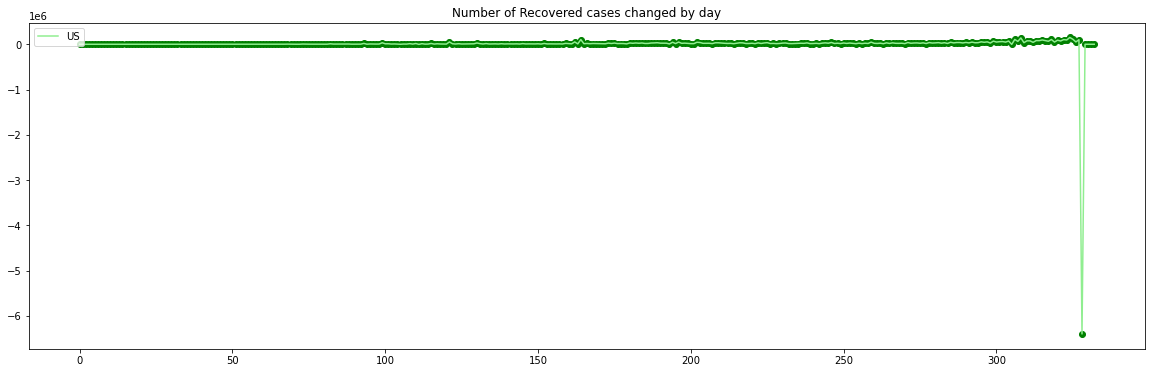

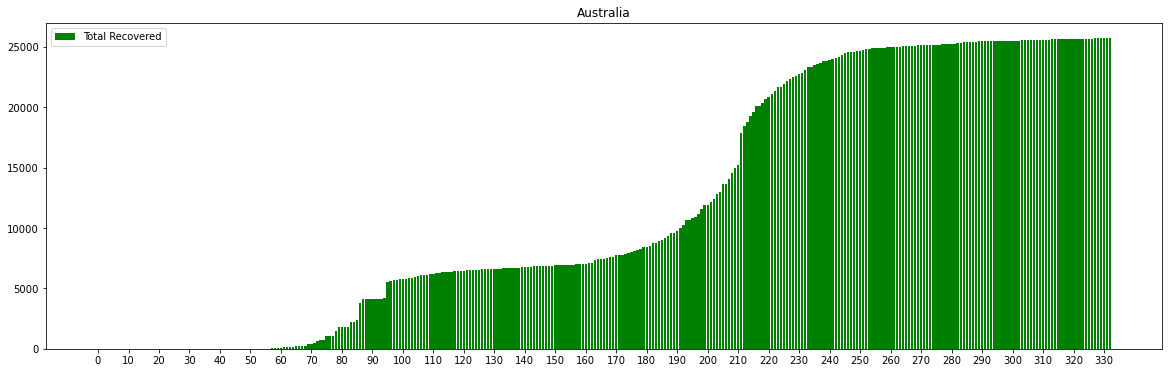

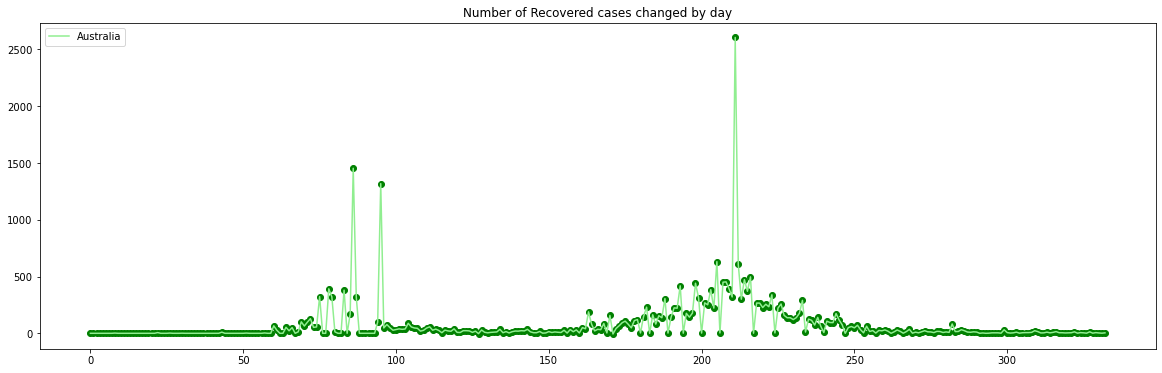

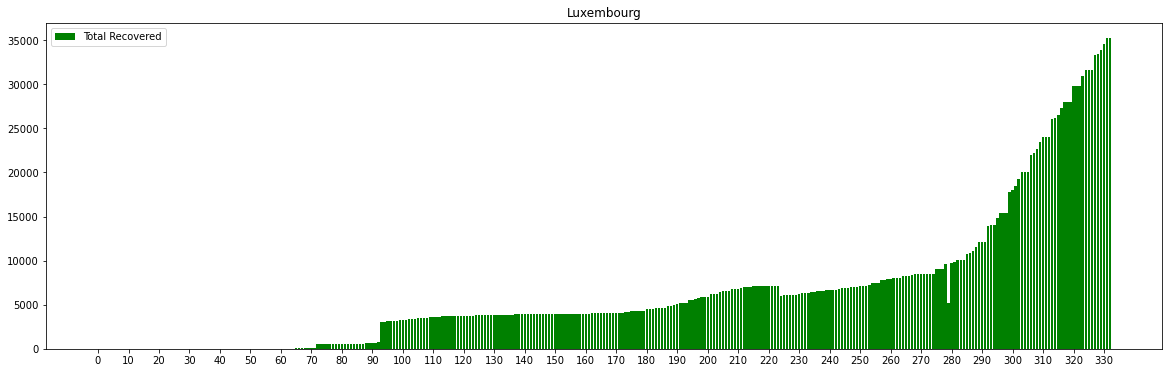

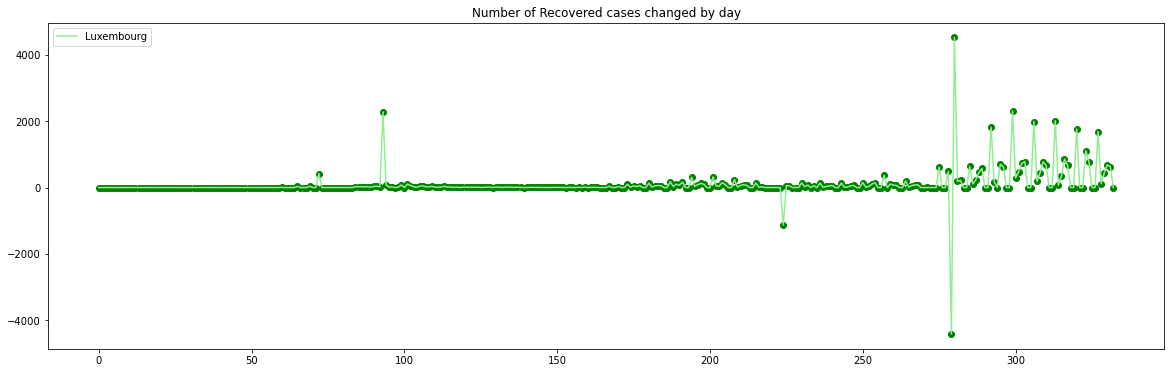

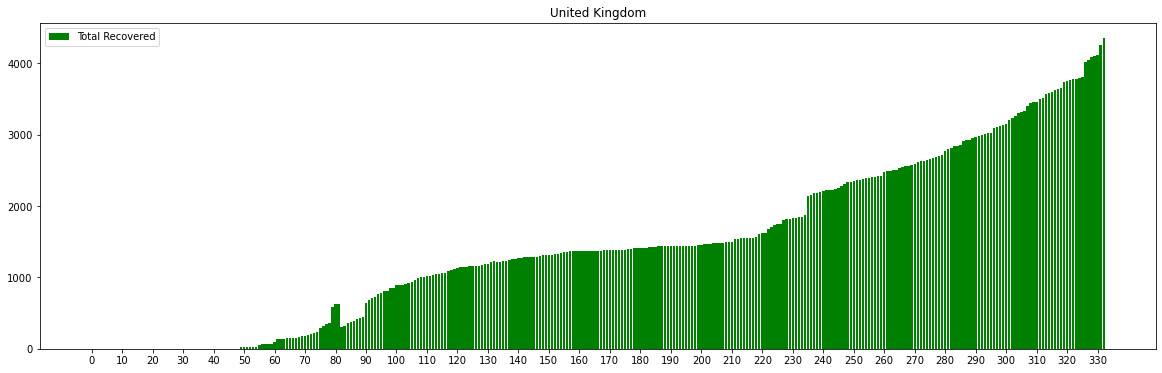

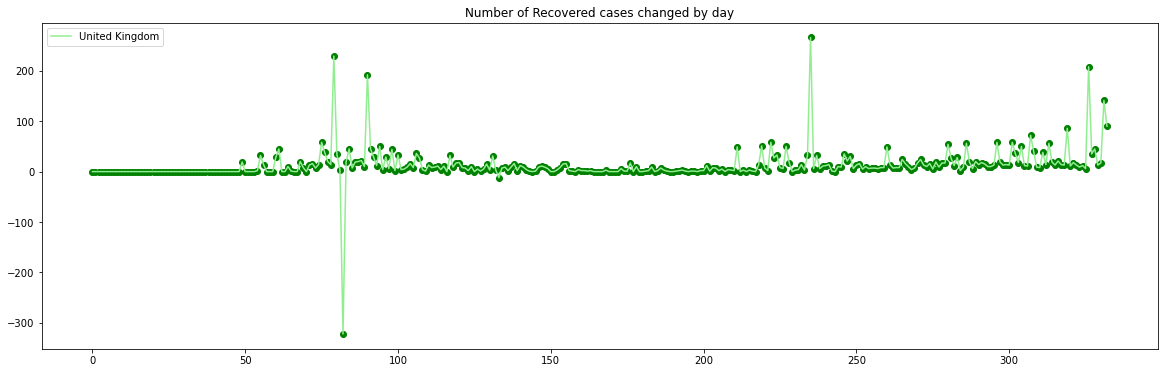

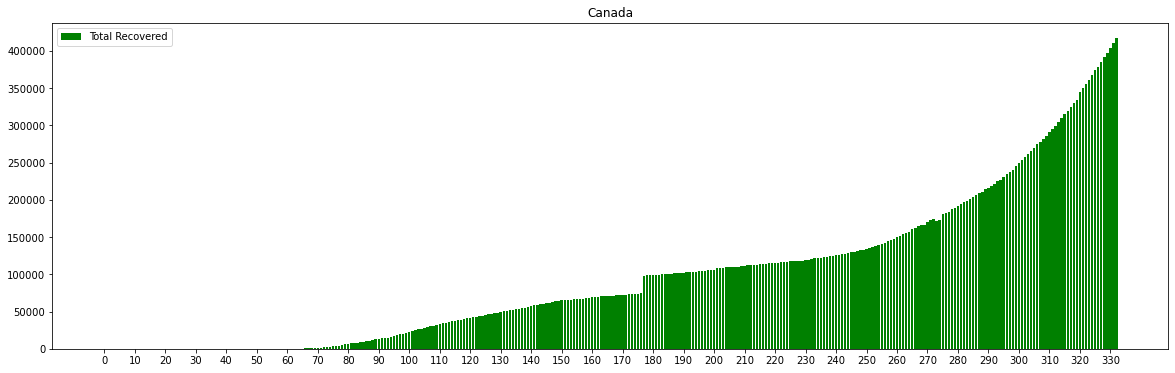

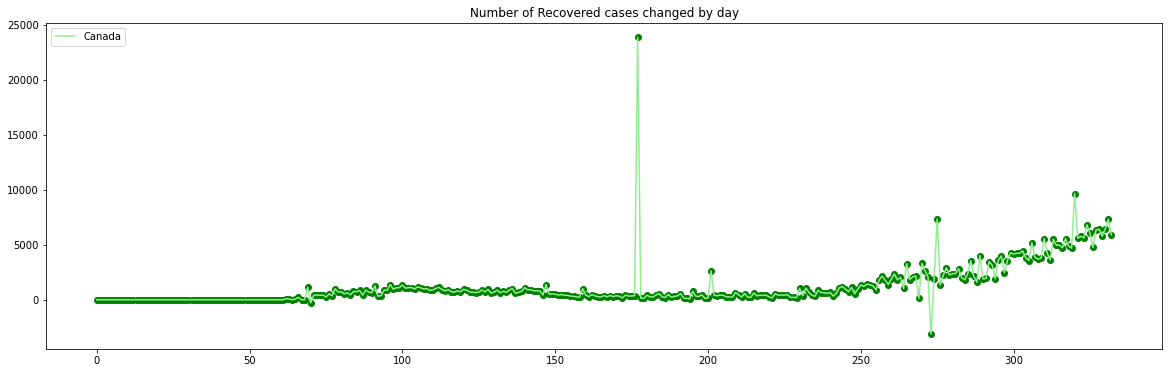

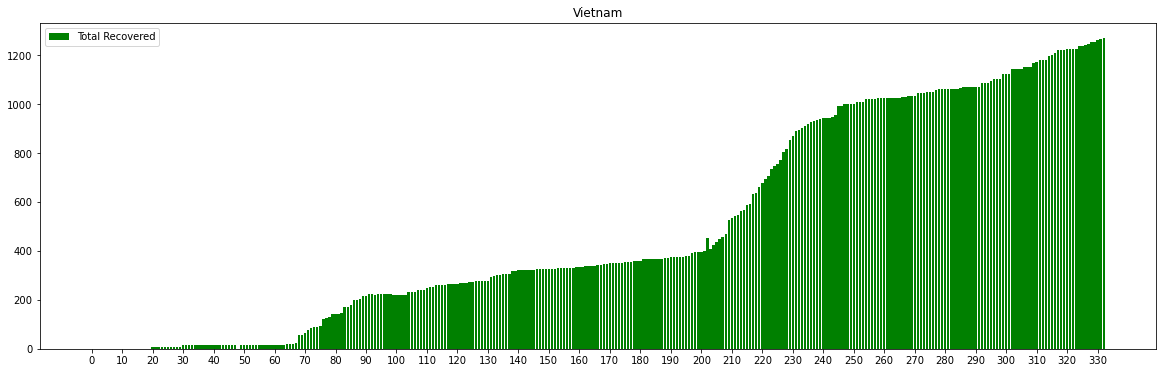

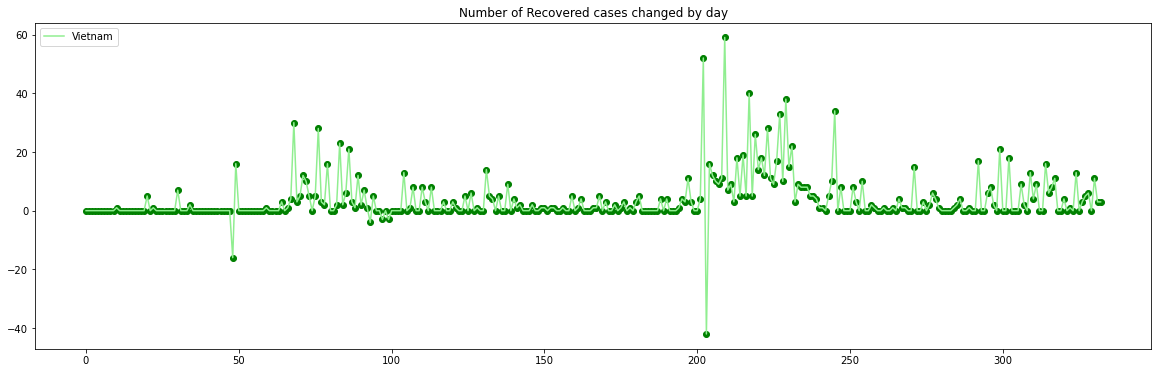

In [7]:
countries = ['China', 'Germany', 'Italy', 'Korea, South', 'Japan', 'US', 'Australia', 'Luxembourg', 'United Kingdom', 'Canada', 'Vietnam']
countriesdf = pd.DataFrame(columns=countries, index=['Last day Increasing', 'Total Recovered', 'Highest Number'])
for country in countries:
    countriesdf[country] = [y_dat_recovered[country][-1]-y_dat_recovered[country][-2], y_dat_recovered[country][-1], np.max(list(list(zip(*y_dat_recovered_ByDay[country]))[1]))]
    
figure = 1
for country in countries:
    plt.figure(figure)
    plt.xticks(np.arange(0, max(x_dat)+1, 10))    
    plt.bar(x_dat, y_dat_recovered[country], color='green', label='Total Recovered')
    plt.title(country)
    plt.legend(loc='upper left')
    figure = figure+1
    
    plt.figure(figure)
    plt.plot(*zip(*y_dat_recovered_ByDay[country]), color='lightgreen', label=country)
    plt.scatter(*zip(*y_dat_recovered_ByDay[country]), color='green')
    plt.title("Number of Recovered cases changed by day")
    plt.legend(loc='upper left')
    figure = figure+1

countriesdf

#### There are bias data found when you see the scattered plot shows the negative values (<0).